In [2]:
import pandas as pd
import json

In [3]:
result_path = '/Users/florianwicher/Desktop/resultData/Sensor_fault/LSTM_result.parquet.gzip'

Data = pd.read_parquet(result_path)

Data['folder_id'] = Data['scenario'].str.split('_').str[0]
Data['scenario_id'] = Data['scenario'].str.split('_').str[1]
Data = Data.drop(['scenario'],axis=1)
Data

,detection_delay,tp,fp,fn,tn,folder_id,scenario_id
0,1,1.0,0.0,0.000116,0.999884,0,100
1,1,1.0,0.0,0.000116,0.999884,0,101
2,4,1.0,0.0,0.000463,0.999537,0,102
3,1,1.0,0.0,0.190025,0.809975,0,103
4,1,1.0,0.0,0.000116,0.999884,0,104
...,...,...,...,...,...,...,...
865,1,1.0,0.0,0.000116,0.999884,5,96
866,5,1.0,0.0,0.000578,0.999422,5,97
867,1,1.0,0.0,0.194556,0.805444,5,98
868,1,1.0,0.0,0.000116,0.999884,5,99


In [4]:
with open('sensor_fault_types.json') as json_file:
        store = json.load(json_file)
        
store

{'drift': [{'folder_id': '0', 'scenario_id': '112'},
  {'folder_id': '0', 'scenario_id': '67'},
  {'folder_id': '0', 'scenario_id': '122'},
  {'folder_id': '0', 'scenario_id': '32'},
  {'folder_id': '0', 'scenario_id': '57'},
  {'folder_id': '0', 'scenario_id': '92'},
  {'folder_id': '0', 'scenario_id': '2'},
  {'folder_id': '0', 'scenario_id': '72'},
  {'folder_id': '0', 'scenario_id': '107'},
  {'folder_id': '0', 'scenario_id': '17'},
  {'folder_id': '0', 'scenario_id': '87'},
  {'folder_id': '0', 'scenario_id': '42'},
  {'folder_id': '0', 'scenario_id': '137'},
  {'folder_id': '0', 'scenario_id': '27'},
  {'folder_id': '0', 'scenario_id': '7'},
  {'folder_id': '0', 'scenario_id': '97'},
  {'folder_id': '0', 'scenario_id': '52'},
  {'folder_id': '0', 'scenario_id': '142'},
  {'folder_id': '0', 'scenario_id': '37'},
  {'folder_id': '0', 'scenario_id': '127'},
  {'folder_id': '0', 'scenario_id': '62'},
  {'folder_id': '0', 'scenario_id': '117'},
  {'folder_id': '0', 'scenario_id': '22'

In [5]:
data = []
for key, values in store.items():
    for entry in values:
        entry['key'] = key
        data.append(entry)

df = pd.DataFrame(data)
df

,folder_id,scenario_id,key
0,0,112,drift
1,0,67,drift
2,0,122,drift
3,0,32,drift
4,0,57,drift
...,...,...,...
865,5,36,constant
866,5,76,constant
867,5,71,constant
868,5,41,constant


In [6]:
# Funktion zum Eintragen des Keys in die dritte Spalte basierend auf 'folder_id' und 's_id'
def eintrag_key(row):
    for key, values in store.items():
        for entry in values:
            if entry['folder_id'] == row['folder_id'] and entry['scenario_id'] == row['scenario_id']:
                return key
    return None  # Wenn kein übereinstimmender Key gefunden wurde

# Die Funktion auf jede Zeile des DataFrames anwenden
Data['key'] = Data.apply(eintrag_key, axis=1)

# Anzeigen des aktualisierten DataFrames


In [7]:
Data

,detection_delay,tp,fp,fn,tn,folder_id,scenario_id,key
0,1,1.0,0.0,0.000116,0.999884,0,100,stuckzero
1,1,1.0,0.0,0.000116,0.999884,0,101,constant
2,4,1.0,0.0,0.000463,0.999537,0,102,drift
3,1,1.0,0.0,0.190025,0.809975,0,103,normal
4,1,1.0,0.0,0.000116,0.999884,0,104,percentage
...,...,...,...,...,...,...,...,...
865,1,1.0,0.0,0.000116,0.999884,5,96,constant
866,5,1.0,0.0,0.000578,0.999422,5,97,drift
867,1,1.0,0.0,0.194556,0.805444,5,98,normal
868,1,1.0,0.0,0.000116,0.999884,5,99,percentage


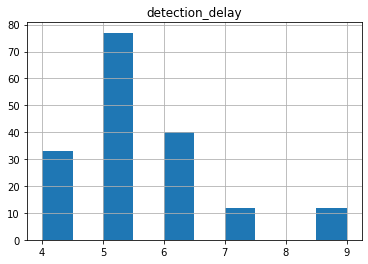

In [12]:
df_drift = Data[Data['key']=='drift']
df_drift.hist('detection_delay');

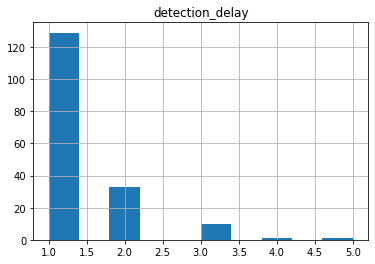

In [13]:
df_normal = Data[Data['key']=='normal']
df_normal.hist('detection_delay');

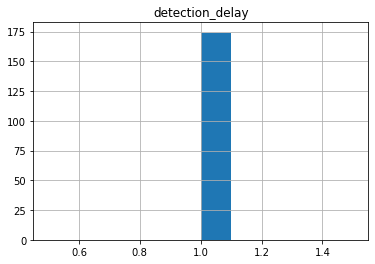

In [14]:
df_percentage = Data[Data['key']=='percentage']
df_percentage.hist('detection_delay');

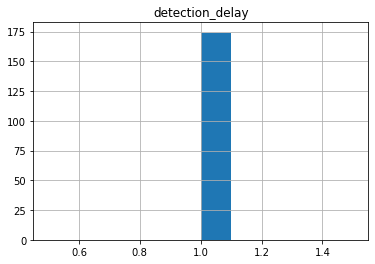

In [15]:
df_constant = Data[Data['key']=='constant']
df_constant.hist('detection_delay');

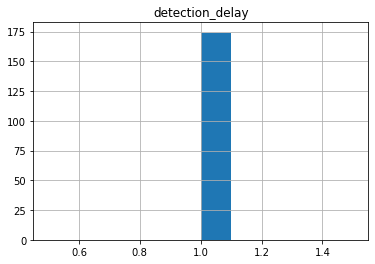

In [16]:
df_stuck_zero = Data[Data['key']=='stuckzero']
df_stuck_zero.hist('detection_delay');

In [33]:
dfs = [df_constant, df_drift, df_normal, df_percentage, df_stuck_zero]
df_names = ['df_constant', 'df_drift', 'df_normal', 'df_percentage', 'df_stuck_zero']

for i in range(len(dfs)):
    print(f"{df_names[i]} tn mean: {dfs[i].tn.mean()}")
    print(f"{df_names[i]} tn median: {dfs[i].tn.median()}")
    print(f"{df_names[i]} tn min: {dfs[i].tn.min()}")
    print(f"{df_names[i]} tn max: {dfs[i].tn.max()}")
    print(" "*40)
    
for i in range(len(dfs)):
    print(f"{df_names[i]} detection_delay mean: {dfs[i].detection_delay.mean()}")
    print(f"{df_names[i]} detection_delay median: {dfs[i].detection_delay.median()}")
    print(f"{df_names[i]} detection_delay min: {dfs[i].detection_delay.min()}")
    print(f"{df_names[i]} detection_delay max: {dfs[i].detection_delay.max()}")
    print(" "*40)

df_constant tn mean: 0.9998842726536266
df_constant tn median: 0.999884272653628
df_constant tn min: 0.999884272653628
df_constant tn max: 0.999884272653628
                                        
df_drift tn mean: 0.9993691668591026
df_drift tn median: 0.9994216310005783
df_drift tn min: 0.9989594172736732
df_drift tn max: 0.999537251272559
                                        
df_normal tn mean: 0.7959175618842557
df_normal tn median: 0.8000370541860367
df_normal tn min: 0.7363845563794426
df_normal tn max: 0.8267942583732057
                                        
df_percentage tn mean: 0.9996138636492231
df_percentage tn median: 0.999884272653628
df_percentage tn min: 0.960213380751278
df_percentage tn max: 0.999884272653628
                                        
df_stuck_zero tn mean: 0.9998842726536266
df_stuck_zero tn median: 0.999884272653628
df_stuck_zero tn min: 0.999884272653628
df_stuck_zero tn max: 0.999884272653628
                                        
df_consta

In [28]:
print("Mean DF_normal: ", df_normal.tn.mean())
print("Median DF_normal: ", df_normal.tn.median())
print("Min DF_normal: ", df_normal.tn.min())
print("Max DF_normal: ", df_normal.tn.max())



Mean DF_normal:  0.7959175618842557
Median DF_normal:  0.8000370541860367
Min DF_normal:  0.7363845563794426
Max DF_normal:  0.8267942583732057


In [34]:
print("Mean DF_constant: ", df_constant.tn.median())
print("Mean DF_percentage: ", df_percentage.tn.median())
print("Mean DF_stuckzero: ", df_stuck_zero.tn.median())


Mean DF_constant:  0.999884272653628
Mean DF_percentage:  0.999884272653628
Mean DF_stuckzero:  0.999884272653628


# Plot Time Series with different Fault Types